In [38]:
import numpy       as np
import pandas      as pd
import seaborn     as sb
import altair      as alt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

### LECTURA DATA

In [44]:
df = pd.read_excel("../macros_AI_sat.xlsx", sheet_name="Hoja2",index_col="Uniprot Code")
df.rename(columns={"Tipo de Macro": "MacroType"}, inplace=True)
df["Longitud"] = df.Secuencia.str.len()
df["SplittedSeq"] = df.Secuencia.str.split("")#replace(""," ") 
df.head()

,MacroType,Secuencia,Longitud,SplittedSeq
Uniprot Code,,,,
O28751,AF-1521-like,MEVLFEAKVGDITLKLAQGDITQYPAKAIVNAANKRLEHGGGVAYA...,192,"[, M, E, V, L, F, E, A, K, V, G, D, I, T, L, K..."
D3RWS7,AF-1521-like,MEVEVVRELEMDKLKVKLAGGDITKYPAEAIVNAANKYLEHGGGVA...,193,"[, M, E, V, E, V, V, R, E, L, E, M, D, K, L, K..."
D2RH24,AF-1521-like,MVVKKFGSVEVVLEKGDITKYPAEAIVNAANKYLEHGGGVALAIAK...,193,"[, M, V, V, K, K, F, G, S, V, E, V, V, L, E, K..."
A0A0F7ICE9,AF-1521-like,MKPEVVLRFSGVEVRLVQGDITKYPAEAIVNAANRHLEHGGGVAYA...,194,"[, M, K, P, E, V, V, L, R, F, S, G, V, E, V, R..."
A0A075LQ95,AF-1521-like,MNLTELTFGNLTFKLAQGDITKLPAEAIVNAANKYLEHGGGVALAI...,190,"[, M, N, L, T, E, L, T, F, G, N, L, T, F, K, L..."


### CONTEO FREQ DE ELEMENTOS POR TIPO DE MACRO

In [48]:
rows = list()
for row in df[['MacroType', 'SplittedSeq']].iterrows():
    r = row[1]
    for elementSeq in r.SplittedSeq:
        rows.append((r.MacroType, elementSeq))

df_2 = pd.DataFrame(rows, columns=['MacroType', 'ElementSeq'])
df_2 = df_2[df_2.ElementSeq.str.len() > 0] #
df_2.head(5000)

,MacroType,ElementSeq
1,AF-1521-like,M
2,AF-1521-like,E
3,AF-1521-like,V
4,AF-1521-like,L
5,AF-1521-like,F
...,...,...
5024,ALC1-like,Y
5025,ALC1-like,Q
5026,ALC1-like,D
5027,ALC1-like,I


n_w
MacroType    ElementSeq      
AF-1521-like E            228
             A            226
             V            212
             K            206
             G            181
...                       ...
Virus-type   V           5254
             L           4633
             A           3856
             S           3714
             G           3467

[90 rows x 1 columns]

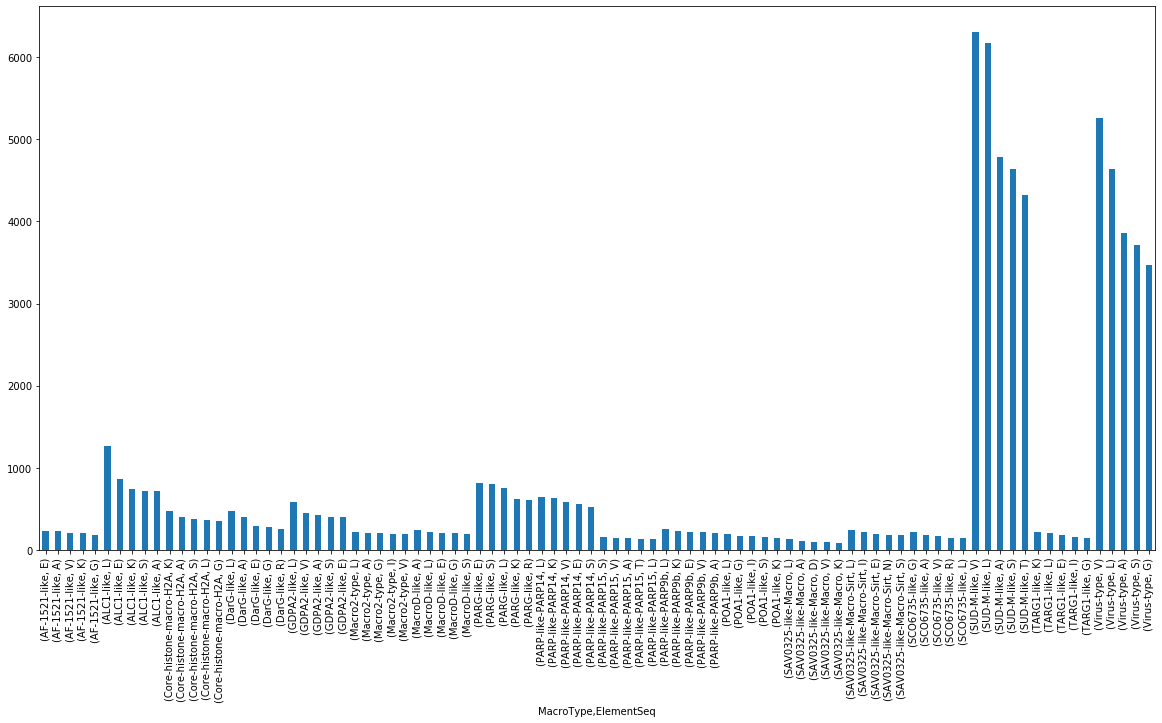

In [59]:
import matplotlib
matplotlib.rc('figure', figsize=(20, 10))

counts = df_2.groupby('MacroType')\
    .ElementSeq.value_counts()\
    .to_frame()\
    .rename(columns={'ElementSeq':'n_w'})


def pretty_plot_top_n(series, top_n=5, index_level=0):
    r = series\
    .groupby(level=index_level)\
    .nlargest(top_n)\
    .reset_index(level=index_level, drop=True)
    r.plot.bar()
    return r.to_frame()

pretty_plot_top_n(counts['n_w'])

#### Conclusión;
V, L, A, S, G -> Muy comúnes en __VIRUS__ y __SUD-M-like__

### CALCULO TF DENTRO EL TIPO DE MACRO

In [53]:
#calculo num total de elementos por grupo
seq_sum = counts.groupby(level=0)\
    .sum()\
    .rename(columns={'n_w': 'n_d'})
seq_sum

,n_d
MacroType,
AF-1521-like,2071
ALC1-like,9999
Core-histone-macro-H2A,4024
DarG-like,3944
GDPA2-like,5795
Macro2-type,2730
MacroD-like,2595
PARG-like,9588
PARP-like-PARP14,7143


In [54]:
tf = counts.join(seq_sum)
tf['tf'] = tf.n_w/tf.n_d
tf.head()

n_w   n_d        tf
MacroType    ElementSeq                     
AF-1521-like E           228  2071  0.110092
             A           226  2071  0.109126
             V           212  2071  0.102366
             K           206  2071  0.099469
             G           181  2071  0.087397

tf
MacroType    ElementSeq          
AF-1521-like E           0.110092
             A           0.109126
             V           0.102366
             K           0.099469
             G           0.087397
...                           ...
Virus-type   V           0.097212
             L           0.085722
             A           0.071345
             S           0.068718
             G           0.064148

[90 rows x 1 columns]

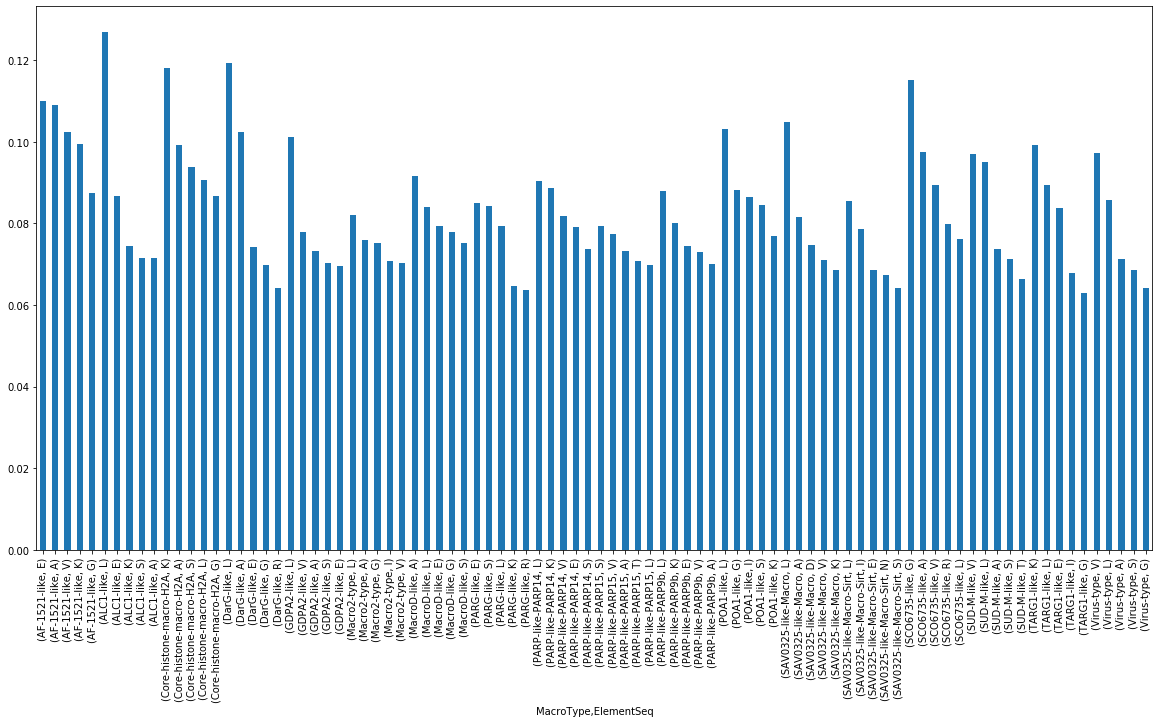

In [60]:
matplotlib.rc('figure', figsize=(20, 10))
pretty_plot_top_n(tf['tf'])

In [40]:
#De Javi
bars = alt.Chart(df).mark_bar().encode(
    x='count(y):Q',
    y=alt.Y('Tipo de Macro:N', sort='-x')
)

text = bars.mark_text(align='left',baseline='middle',dx=3).encode(text='count(y):Q')
(bars + text).properties(height=300)

alt.LayerChart(...)